In [1]:
# Muhamad Adhytia Wana Putra Rahmadhan
# https://www.dicoding.com/users/adhytia

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-02-16 04:26:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.43MB/s    in 3m 32s  

2021-02-16 04:30:00 (1.45 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
pip install split-folders

In [6]:
import splitfolders
splitfolders.ratio(base_dir, output='/tmp/rockpaperscissors/', seed=1337, ratio=(.6, 0.4)) 

Copying files: 2188 files [00:00, 4400.06 files/s]


In [7]:
train_dir = '/tmp/rockpaperscissors/train'
validation_dir = '/tmp/rockpaperscissors/val'

os.listdir(train_dir)
os.listdir(validation_dir)

['paper', 'rock', 'scissors']

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest')

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5, 
      verbose=2)

Epoch 1/20
25/25 - 14s - loss: 1.1503 - accuracy: 0.4112 - val_loss: 0.9896 - val_accuracy: 0.5562
Epoch 2/20
25/25 - 7s - loss: 0.8808 - accuracy: 0.6137 - val_loss: 0.8326 - val_accuracy: 0.6687
Epoch 3/20
25/25 - 7s - loss: 0.5345 - accuracy: 0.7925 - val_loss: 0.3975 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 7s - loss: 0.3320 - accuracy: 0.8800 - val_loss: 0.3025 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 7s - loss: 0.2675 - accuracy: 0.9013 - val_loss: 0.3770 - val_accuracy: 0.8687
Epoch 6/20
25/25 - 7s - loss: 0.2934 - accuracy: 0.8938 - val_loss: 0.2894 - val_accuracy: 0.8875
Epoch 7/20
25/25 - 7s - loss: 0.2252 - accuracy: 0.9237 - val_loss: 0.2615 - val_accuracy: 0.9187
Epoch 8/20
25/25 - 7s - loss: 0.2109 - accuracy: 0.9225 - val_loss: 0.2250 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 7s - loss: 0.2102 - accuracy: 0.9275 - val_loss: 0.1905 - val_accuracy: 0.9312
Epoch 10/20
25/25 - 7s - loss: 0.1733 - accuracy: 0.9262 - val_loss: 0.0761 - val_accuracy: 0.9750
Epoch 11/20
25/25 

In [13]:
# function to return key for any value
def get_key(val):
  for key, value in train_generator.class_indices.items():
    if val == value:
      return key
  return "error"

Saving depositphotos_96425094-stock-photo-isolated-hand-make-scissors-or.png to depositphotos_96425094-stock-photo-isolated-hand-make-scissors-or.png
depositphotos_96425094-stock-photo-isolated-hand-make-scissors-or.png
[[0. 0. 1.]]
scissors


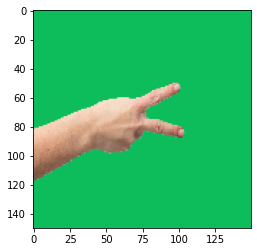

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  print(classes[0:])
  offset = classes.argmax(axis=-1)
  print(get_key(offset[0]))